In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

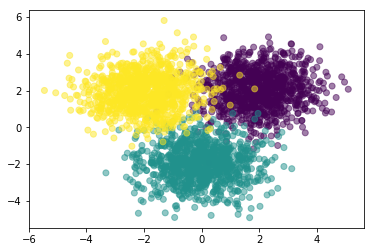

In [3]:
D = 2
K = 3
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)

In [11]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, P_hat):
    return np.mean(y == P_hat.argmax(axis = 1))

In [13]:
Y = one_hot_encode(y)

PHI = np.column_stack((np.ones((N,1)), X))

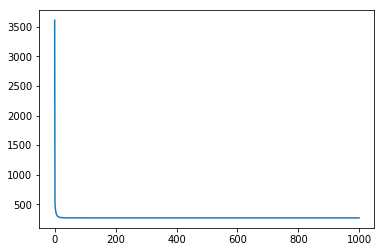

In [14]:
W = np.random.randn(D + 1,K)

eta = 1e-3
epochs = int(1e3)
J = np.zeros(epochs)

for epoch in range(epochs):
    P_hat = softmax(PHI.dot(W))
    J[epoch] = cross_entropy(Y,P_hat)
    W -= eta*PHI.T.dot(P_hat - Y)
    
plt.figure()
plt.plot(J)

In [15]:
print("Accuracy: {:0.4f}".format(accuracy(y,P_hat)))

Accuracy: 0.9677


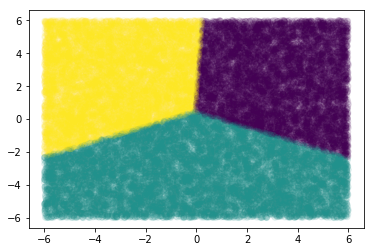

In [20]:
X_vis = np.random.uniform(-6,6,(N*10,D))
PHI_vis = np.column_stack((np.ones((N*10,1)),X_vis))

P_hat_vis = softmax(PHI_vis.dot(W))

plt.figure()
plt.scatter(X_vis[:,0], X_vis[:,1], c = P_hat_vis.argmax(axis = 1), alpha = 0.1)